# get the data

In [660]:
import pandas as pd

In [661]:
train_set= pd.read_csv('train.csv')
test_set= pd.read_csv('test.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# analyze the data

In [662]:
train_set.shape

(891, 12)

In [663]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

elementos nulos


In [664]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# visulizing the data

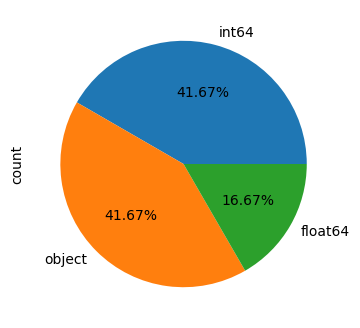

In [665]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
train_set.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

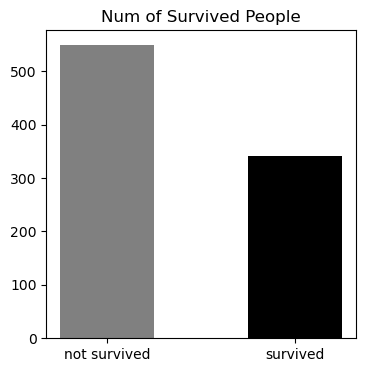

In [666]:
plt.figure(figsize=(4,4))
plt.bar(['not survived','survived'], list(train_set['Survived'].value_counts()), width=0.5,color=('grey', 'black'))
plt.title("Num of Survived People")
plt.show()

In [667]:
#passenger's class
train_set['Pclass'].value_counts() 

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

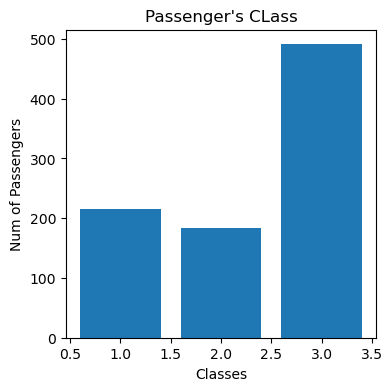

In [668]:
plt.figure(figsize=(4,4))
plt.bar(list(train_set['Pclass'].value_counts().keys()), list(train_set['Pclass'].value_counts()))
plt.title("Passenger's CLass")
plt.xlabel("Classes")
plt.ylabel("Num of Passengers")
plt.show()

In [669]:
#gender
train_set['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

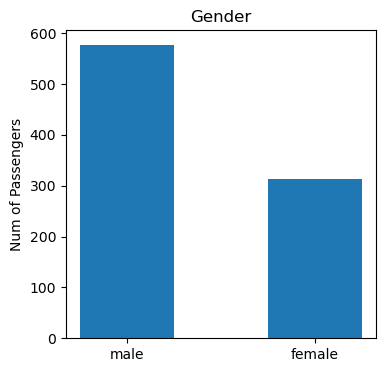

In [670]:
plt.figure(figsize=(4,4))
plt.bar(list(train_set['Sex'].value_counts().keys()), list(train_set['Sex'].value_counts()),width=0.5)
plt.title("Gender")
plt.ylabel("Num of Passengers")
plt.show()

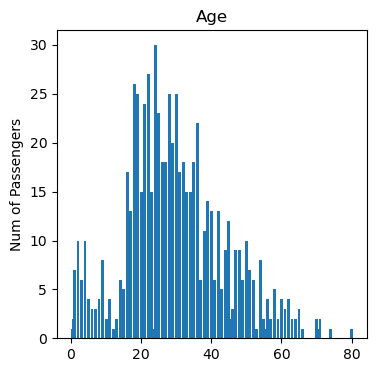

In [671]:
#age
plt.figure(figsize=(4,4))
plt.bar(list(train_set['Age'].value_counts().keys()), list(train_set['Age'].value_counts()))
plt.title("Age")
plt.ylabel("Num of Passengers")
plt.show()

d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


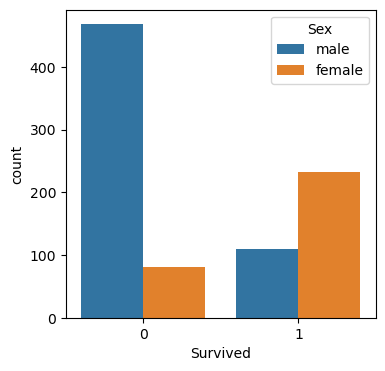

In [672]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(x="Survived", hue='Sex', data=train_set)
plt.show()

# data preprocessing

In [673]:
import statistics as sts
mediana = sts.median(train_set['Age'])
train_set['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [674]:
mean= train_set['Age'].mean()
train_set.loc[(train_set['Age']<1),'Age'] = mean
train_set['Age'].fillna(mean,inplace=True)
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [675]:
train_set['Age'].describe()

count    891.000000
mean      29.926642
std       12.743774
min        1.000000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [676]:
train_set = train_set.drop('Cabin', axis=1)
train_set=train_set.drop('Name', axis=1)
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [677]:
bl_col = train_set.select_dtypes(include=('boolean'))
str_col_train = train_set.select_dtypes(include=('object')).columns

In [678]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in str_col_train:
    train_set[col] = LE.fit_transform(train_set[col].astype('str'))
train_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,2
1,2,1,1,0,38.000000,1,0,596,71.2833,0
2,3,1,3,0,26.000000,0,0,669,7.9250,2
3,4,1,1,0,35.000000,1,0,49,53.1000,2
4,5,0,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,2
887,888,1,1,0,19.000000,0,0,14,30.0000,2
888,889,0,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,1,26.000000,0,0,8,30.0000,0


In [679]:
x = train_set.drop(['Survived'], axis=True)
y = train_set[["Survived"]]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,1,22.000000,1,0,523,7.2500,2
1,2,1,0,38.000000,1,0,596,71.2833,0
2,3,3,0,26.000000,0,0,669,7.9250,2
3,4,1,0,35.000000,1,0,49,53.1000,2
4,5,3,1,35.000000,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,101,13.0000,2
887,888,1,0,19.000000,0,0,14,30.0000,2
888,889,3,0,29.699118,1,2,675,23.4500,2
889,890,1,1,26.000000,0,0,8,30.0000,0


In [680]:
mean= test_set['Age'].mean()
test_set.loc[(test_set['Age']<1),'Age'] = mean
test_set['Age'].fillna(mean,inplace=True)
test_set.isnull().sum()
test_set = test_set.drop('Cabin', axis=1)
test_set=test_set.drop('Name', axis=1)
str_col_test = test_set.select_dtypes(include=('object')).columns
for col in str_col_test:
    test_set[col] = LE.fit_transform(test_set[col].astype('str'))
test_set['Fare'].fillna(test_set['Fare'].mean(),inplace=True)
test_set.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# model train and test

In [681]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [682]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score  
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  
# 训练模型  
dt.fit(x_train, y_train)  
# 预测测试集  
predy = dt.predict(x_test)  
# 计算预测准确率  
score = accuracy_score(y_test, predy)  
print('Model accuracy: ', score)

Model accuracy:  0.7985074626865671


In [683]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=15,n_estimators=100,criterion='gini', random_state=42)
rf.fit(x_train, y_train)
predy = rf.predict(x_test)
rf.score(x_test, y_test)

d:\Anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8134328358208955

In [691]:
# svm
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score  
# 定义 SVM 模型  
svm = SVC(kernel='poly',C=1, random_state=42)  
# 训练模型  
svm.fit(x_train, y_train)  
# 预测测试集  
predy = svm.predict(x_test)   
# 计算预测准确率  
score = accuracy_score(y_test, predy)  
print('Model accuracy: ', score)

Model accuracy:  0.6231343283582089


d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [686]:
#knn
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
predy = knn.predict(x_test)
knn.score(x_test, y_test)

d:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.6492537313432836

In [687]:
# XGBoost
import xgboost as xgb  
from sklearn.metrics import accuracy_score  
xgb_classifier=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_classifier.fit(x_train, y_train)
predy = xgb_classifier.predict(x_test)
# 计算预测准确率  
score_XGB= accuracy_score(y_test, predy)  
print('Model accuracy: ', score_XGB)

Model accuracy:  0.7835820895522388


In [688]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.metrics import accuracy_score  
# 创建 AdaBoostClassifier 实例  
ada_classifier = AdaBoostClassifier(base_estimator=dt,n_estimators=300,learning_rate=0.2,random_state=42)  
# 训练模型  
ada_classifier.fit(x_train, y_train)  
# 预测测试集  
predy = ada_classifier.predict(x_test)  
# 计算预测准确率  
score_AdaBoost = accuracy_score(y_test, predy)  
print('Model accuracy: ', score_AdaBoost)

d:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Anaconda\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model accuracy:  0.7947761194029851


# result

In [689]:
result=rf.predict(test_set)

In [690]:
output = pd.DataFrame({
"PassengerId":  list(range(892, 1310)),
"Survived": result
})
output.to_csv('submission.csv', index=False)